# Regression and Classification
Karlee Zammit - V00823093

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import model_selection as md
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## Functions

In [ ]:
def PCA_analysis(df): 
    
    # Initialize the normalization estimator 
    sc = StandardScaler()

    # Train the estimator on the input data. This method calculates the mean and variance of each of the features present in the data. 
    sc.fit(df)

    # Apply the method to the a data, to transform all of the features using their respective mean and variance.
    df_norm = sc.transform(df)

    # Initialize scikit learns principal component analysis function
    pca = PCA()

    # Determine transformed features
    df_analysis_pca = pca.fit_transform(df_norm)

    # Determine explained variance using explained_variance_ration_ attribute
    exp_var_pca = pca.explained_variance_ratio_

    # Cumulative sum of eigenvalues; This will be used to create step plot
    # for visualizing the variance explained by each principal component.
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)

    # Create the visualization plot
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Component Index')
    plt.title('Explained Variance Ratio vs. Principal Component Index for the Sachs Harbour Dataset')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [ ]:
def split_data(X,Y, test_size, normalize):
    # Split the input and target data into test and train, with 75% of the data going to training, and 25% of the data going to testing
    X_tr, X_va, Y_tr, Y_va = train_test_split(X,Y.values.ravel(),test_size=test_size)

    # Print the shape of the split data
    print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))
    
    # Normalize the data, as was done in Q2
    scaler_S= StandardScaler().fit(X_tr)  # line #2
    X_tr_Norm= scaler_S.transform(X_tr) # line # 3
    X_va_Norm= scaler_S.transform(X_va)  # Line #4
    
    n_column = 2

    # Plot a figure of the normalized training and validation set to ensure they represent the same distribution and spread
    
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(X_tr_Norm[:,n_column])
    plt.title('Training set')
    plt.ylabel('N')
    plt.xlabel("X"+str(n_column))

    plt.subplot(1, 2, 2)
    plt.hist(X_va_Norm[:,n_column])
    plt.title('Validation set')
    plt.ylabel('N')
    plt.xlabel("X"+str(n_column))
    
    if normalize == 1:
        return X_tr_Norm, X_va_Norm, Y_tr, Y_va
    else: 
        return X_tr, X_va, Y_tr, Y_va

# Regression

## Sachs Harbour Dataset

(9982, 23)
564
<bound method NDFrame.head of       Deployment  Year  Month  Day  Hour                DateTime   10-100Hz  \
0              1  2015      5   18    15 2015-05-18 15:00:00.000  86.113543   
1              1  2015      5   18    16 2015-05-18 16:00:00.000  86.100652   
2              1  2015      5   18    17 2015-05-18 17:00:00.000  69.981675   
3              1  2015      5   18    18 2015-05-18 18:00:00.000  68.305432   
4              1  2015      5   18    19 2015-05-18 19:00:00.000  68.952387   
...          ...   ...    ...  ...   ...                     ...        ...   
9977           2  2016      7    8     9 2016-07-08 09:00:38.850  88.473886   
9978           2  2016      7    8    10 2016-07-08 10:00:38.855  84.992894   
9979           2  2016      7    8    11 2016-07-08 11:00:38.860  86.025931   
9980           2  2016      7    8    12 2016-07-08 12:00:38.865  92.177529   
9981           2  2016      7    8    13 2016-07-08 13:00:38.870  91.206801   

      

Text(0, 0.5, 'Number of Samples')

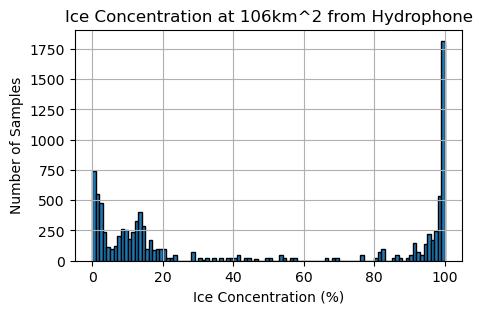

In [11]:
# Load in the data csv and print it's shape
df_SH = pd.read_excel('Ambient Sound Data Sachs Harbour 2015-2016.xlsx')
print(df_SH.shape)

# Count the existing nans
nan_count = df_SH.isna().sum().sum()
print(nan_count)

print(df_SH.head)

# Drop non necessary columns 
df_hist = df_SH.drop(['Deployment', 'DateTime', 'Ice', 'Month', 'Day', 'Year', 'Hour'], axis=1)
df_SH = df_SH.drop(['Deployment','DateTime', 'Ice'], axis=1)


#encoder = OneHotEncoder()
#transformed = encoder.transform(df_SH['Month'].to_numpy().reshape(-1, 1))
#Create a Pandas DataFrame of the hot encoded column
#ohe_df = pd.DataFrame(transformed, columns=jobs_encoder.get_feature_names())
#concat with original data
#data = pd.concat([data, ohe_df], axis=1).drop(['Profession'], axis=1)

# Double check there are no nans 
df_SH=df_SH.dropna(axis=0)

# Plot a histogram of the data
#df_SH.hist(figsize=(14, 12), bins=100, edgecolor="black")
print(df_SH.shape)

#df_hist.hist()

df_SH.Ice106km2.hist(figsize=(5, 3), bins=100, edgecolor="black")
plt.title('Ice Concentration at 106km^2 from Hydrophone')
plt.xlabel('Ice Concentration (%)')
plt.ylabel('Number of Samples')

In [ ]:
PCA_analysis(df_SH)

In [ ]:
# Set temperature as the target variable
var = ['Temperature']

# Drop temperature out of the weather data, and set it as X
X = df_SH.loc[:,df_SH.columns.drop(var)]
print(X.columns)

# Set the target (Y) to be temperature
Y = df_SH[var].copy()
print(Y.columns)

# Call the split data function
X_tr, X_va, Y_tr, Y_va = train_test_split(X,Y.values.ravel(),test_size=0.25)

# Print the shape of the split data
print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

# Normalize the data, as was done in Q2
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

In [ ]:
# Plot a correlation coefficient matrix
corr = df_SH.corr()
ax = plt.axes()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)
plt.title('Correlation Coefficient Matrix for Sachs Harbour Dataset')

# Classification

## Forest Cover Dataset

In [2]:
df = pd.read_csv('covtype.csv')
print(df.shape)

(581012, 55)


In [ ]:
# Plot a correlation coefficient matrix

df_hist = df.drop(['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'], axis=1)


corr = df_hist.corr()
ax = plt.axes()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)
plt.title('Correlation Coefficient Matrix for Forest Cover Dataset')

df_hist.hist(figsize=(12, 9), bins=30, edgecolor="black")

In [3]:
# "class" column as numpy array.
y = df["Cover_Type"].values
print(type(y))

# All data except "class" column.
x = df.drop(["Cover_Type"], axis=1).values
print(x.shape)

ohe = OneHotEncoder(sparse=False)
tar= np.reshape(y,(-1,1))
tar = ohe.fit_transform(tar)

# Split data for train and test.
X_tr, X_va, Y_tr, Y_va = train_test_split(x,tar,test_size=0.25)

# Print the shape of the split data
print('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

# Normalize the data, as was done in Q2
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

x_df = df.drop(["Cover_Type"], axis=1)
X_tr_df = pd.DataFrame(X_tr, columns = x_df.columns)

<class 'numpy.ndarray'>
(581012, 54)
training set ==  (435759, 54) (435759, 7) ,, validation set ==  (145253, 54) (145253, 7)


In [4]:
df_val = df.merge(X_tr_df.drop_duplicates(), how='left', indicator=True)
df_val = df_val.loc[df_val['_merge'] == 'left_only']
df_val = df_val.drop('_merge', axis=1)

#print(df_val.columns)

# Get the minimum number of values in the smallest class to create a balanced validation set 
minimum = []
for ii in range(0, 6):
    class_num = df_val.loc[df_val['Cover_Type'] == ii+1]
    minimum.append(class_num.shape[0])
min_num = min(minimum)
print(min_num)

class_1 = df_val.loc[df_val['Cover_Type'] == 1]
class_all_bal = class_1.sample(n=min_num)

for ii in range(1,7):
    class_n = df_val.loc[df_val['Cover_Type'] == ii+1]
    class_n_sample = class_n.sample(n=min_num)
    class_all_bal = class_all_bal.append(class_n_sample)

# "class" column as numpy array.
y_bal = class_all_bal["Cover_Type"].values

# All data except "class" column.
x_bal = class_all_bal.drop(["Cover_Type"], axis=1).values

ohe = OneHotEncoder(sparse=False)
tar= np.reshape(y_bal,(-1,1))
tar = ohe.fit_transform(tar)

X_tr_bal, X_va_bal, Y_tr_bal, Y_va_bal = train_test_split(x_bal,tar,test_size=0.25)

# Print the shape of the split data
print('training set == ',np.shape(X_tr_bal),np.shape(Y_tr_bal),',, validation set == ', np.shape(X_va_bal),np.shape(Y_va_bal))

# for random forest, you'd want to validate with this balanced set 
# for ANN, you'd want to use only the balanced data, train the same model 10 times on different test sets, and then take the average of the results 

706
training set ==  (3706, 54) (3706, 7) ,, validation set ==  (1236, 54) (1236, 7)


In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#e7298a', '#e31a1c', '#fdbf6f', '#fb9a99', '#fb9a99', '#b2df8a', '#b2df8a']

plt.subplot(1,2,1)
#df_hist.Cover_Type.hist(figsize=(12, 9), bins=30, edgecolor="black")
cnts, values, bars = ax1.hist(df_hist.Cover_Type, edgecolor='k')
for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    bar.set_facecolor(colors[i % len(colors)])
plt.title('Unbalanced Data')
ax1.set_xlabel(r'Cover Type')
ax1.set_ylabel(r'Number of Samples')

plt.subplot(1,2,2)
cnts, values, bars = ax2.hist(class_all_bal.Cover_Type, edgecolor='k')
for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    bar.set_facecolor(colors[i % len(colors)])
plt.title('Balanced Data')
ax2.set_xlabel(r'Cover Type')
ax2.set_ylabel(r'Number of Samples')

In [ ]:
def random_forest_class(X_tr, X_va, Y_tr, Y_va, n_est, max_d, min_samp):
    
    RFclass= RandomForestClassifier(n_estimators=n_est, criterion='entropy', max_depth=max_d, min_samples_leaf=min_samp, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0., bootstrap=True,
                                n_jobs=None, verbose=0)
    ## fitting the model:
    RFclass.fit(X_tr, Y_tr)

    ## predict the response for tr and va sets. We can have two outputs: probability (e.g.,PY_tr_prob ) and  the winner class (e.g.,PY_tr):
    PY_tr_prob = RFclass.predict_proba(X_tr)
    PY_tr = RFclass.predict(X_tr)

    PY_va_prob = RFclass.predict_proba(X_va)
    PY_va = RFclass.predict(X_va)
    
    return PY_tr_prob, PY_va_prob, PY_tr, PY_va


In [ ]:
print(X_tr.shape)
print(X_va_bal.shape)
print(Y_tr.shape)
print(Y_va_bal.shape)

In [ ]:
PY_tr_prob, PY_va_prob, PY_tr, PY_va = random_forest_class(X_tr, X_va_bal, Y_tr, Y_va_bal, n_est=50, max_d=50, min_samp=10)

In [ ]:
plt.figure(1)
plt.hist(PY_tr_prob[0][Y_tr[:,0]==0,0],20,color = "blue",)
plt.xlim([0,1])
plt.legend(['Detections (TR)'])

plt.figure(2)
plt.hist(PY_tr_prob[0][Y_tr[:,0]==1,0],20,color = "red",)
plt.xlim([0,1])
plt.legend(['Non-detections (TR)'])

## ----------------------------------------------------------------------
## plot ROC  and estimate the are under the curve for the training set

fpr = dict()
tpr = dict()
T=dict()
roc_auc = dict()

for i in range(2):
    tpr[i], fpr[i], T[i] = roc_curve(Y_tr[:, i], PY_tr_prob[0][:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(3)

cmap = cm.get_cmap("viridis",50)
plt.scatter(fpr[1], tpr[1], c=T[1],cmap=cmap,vmin=0.,vmax=1)
plt.colorbar()
plt.plot([-0.2,1.2],[-0.2,1.2], '--k')
plt.xlim([-.02,1.02])
plt.ylim([-.02,1.02])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Area Under the Curve = %.3f' %roc_auc[0])

####----------------------------------------------------------------------plotting for validation set
####----------------------------------------------------------------------
####----------------------------------------------------------------------
## Plot the prediccted distributions for the validation set 

plt.figure(6)
plt.hist(PY_va_prob[0][Y_va[:,0]==0,0],20,color = "blue",)
plt.xlim([0,1])
plt.legend(['Detections (VA)'])

plt.figure(7)
plt.hist(PY_va_prob[0][Y_va[:,0]==1,0],20,color = "red",)
plt.xlim([0,1])
plt.legend(['Non-detections (VA)'])

## ----------------------------------------------------------------------
## plot ROC  and estimate the are under the curve for the validation set

fpr = dict()
tpr = dict()
T=dict()
roc_auc = dict()

for i in range(2):
    tpr[i], fpr[i], T[i] = roc_curve(Y_va[:, i], PY_va_prob[0][:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(8)
cmap = cm.get_cmap("viridis",50)
plt.scatter(fpr[1], tpr[1], c=T[1],cmap=cmap,vmin=0.,vmax=1)
plt.colorbar()
plt.plot([-0.2,1.2],[-0.2,1.2], '--k')
plt.xlim([-.02,1.02])
plt.ylim([-.02,1.02])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Area Under the Curve = %.3f' %roc_auc[0])


In [ ]:
print(Y_tr)
print(Y_tr.shape)

In [ ]:
## Run t_SNE (with  dimensions=2 i.e., a new 2-d space) 
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)#, verbose=1, perplexity=40, n_iter=300)
tsne.fit(X_tr_bal)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
tsne_results_tr= tsne.fit_transform(X_tr_bal)

In [ ]:
## see the examples on the selected 2-dim space 

Y_tr_flat = Y_tr_bal.argmax(axis=1)

comX=0
comY=1

plt.figure(figsize=(12,8))
plt.scatter(tsne_results_tr[:,comX], tsne_results_tr[:,comY],
            c=Y_tr_flat, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('component_ '+ str(comX))
plt.ylabel('component_ '+str(comY))
plt.colorbar();
plt.title('Balanced Subset Data for Forest Cover Dataset: t-SNE')

## Mushroom Dataset

https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset

In [ ]:
# Load in data and clean 
df_mushies = pd.read_csv('secondary_data.csv', delimiter=';')
print(df_mushies.shape)
nan_count = df_mushies.isna().sum().sum()
print(nan_count)
print(df_mushies.shape)
df_mushies = df_mushies.dropna(axis=1, how='any')
nan_count = df_mushies.isna().sum().sum()
print(nan_count)
print(df_mushies.shape)

In [ ]:
# This data is categorical 
df_mushies = df_mushies.astype('category')
print(df_mushies)

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df_mushies.columns:
    df_mushies[column] = labelencoder.fit_transform(df_mushies[column])

df_mushies.head()

In [ ]:
# "class" column as numpy array.
y = df_mushies["class"].values
print(type(y))

# All data except "class" column.
x = df_mushies.drop(["class"], axis=1).values
print(x.shape)

Below is data visualization for the Houston weather dataset. The classification output would be a binary classification of "rain" or "no rain" for a given input example. I decided to include this, as it is a very good example of unbalanced data: there are many more non-rainy days than rainy days, and so before this data is used for classification, it will need to be balanced through a exercise such as bootstrapping.

# References



Bishop, C. M. (2006). Pattern recognition and machine learning. In Pattern recognition and machine learning. Springer.

**Datasets:**

Insley, S. J., Halliday, W. D., & de Jong, T. (2017). Seasonal Patterns in Ocean Ambient Noise near Sachs Harbour, Northwest Territories. Arctic, 70(3), 239–248. https://doi.org/10.14430/arctic4662

https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset


ANN:
Biased so need to balance data 
2000 samples from everything randomly
Train on 2000 x N samples 
Do 10 times (w random)
Regression: avg of results
Random forest can handle unbalanced data  

For all models: 
Unbalanced dataset needs to be balanced for validation 
Using the test train split, create 25%, and then from that split, get the smallest number, and then recreate the validation set from that